# Let's look at the raw data, specifically the washover stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,shutil

In [2]:
priority = pd.read_csv('../data/tables/Priority_1604952200293.csv')

In [3]:
list(priority.columns)

['_id',
 'userId',
 'catalogId',
 'archiveId',
 'imageId',
 'date',
 'catalog',
 'archive',
 'image',
 'water',
 'devType',
 'washoverType',
 'dmgType',
 'impactType',
 'terrianType',
 'additionalComments']

In [4]:
priority = priority.drop(['catalog','date', 'water','devType','dmgType','impactType','terrianType','additionalComments'], axis = 1) 
priority = priority.replace({np.NaN: 'noWashover'})
priority.head()

,_id,userId,catalogId,archiveId,imageId,archive,image,washoverType
0,5f5c1dce7bb1cd50684f79be,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3c3b,5f5c1c37016e86108aec3c81,Florence,P26058806.jpg,noWashover
1,5f5c207a7bb1cd50684f79c1,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3d05,5f5c1c37016e86108aec3d5e,Michael,S28468531.jpg,noWashover
2,5f6260617bb1cd50684f79c7,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3d05,5f5c1c37016e86108aec3d58,Michael,S28466899.jpg,noWashover
3,5f62609b7bb1cd50684f79ca,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3ca0,5f5c1c37016e86108aec3ced,Isaias,S21773987.jpg,noWashover
4,5f6290357bb1cd50684f79cc,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3c3b,5f5c1c37016e86108aec3c67,Florence,P26057665.jpg,noWashover


In [5]:
washData = priority[['imageId', 'userId', 'washoverType']]
washData.head()

,imageId,userId,washoverType
0,5f5c1c37016e86108aec3c81,5f4c002a9cdb9b001675a8e2,noWashover
1,5f5c1c37016e86108aec3d5e,5f4c002a9cdb9b001675a8e2,noWashover
2,5f5c1c37016e86108aec3d58,5f4c002a9cdb9b001675a8e2,noWashover
3,5f5c1c37016e86108aec3ced,5f4c002a9cdb9b001675a8e2,noWashover
4,5f5c1c37016e86108aec3c67,5f4c002a9cdb9b001675a8e2,noWashover


In [6]:
#keep the has data to join later
hashes = priority[['imageId','archiveId','archive','image']]

In [7]:
# pivot the wash data
washDataPivot = washData.pivot(index= 'imageId', columns='userId')
washDataPivot.head()

washoverType                           \
userId                   5f4c002a9cdb9b001675a8e2 5f4f13135463f70016a500ed   
imageId                                                                      
5f5c1c37016e86108aec3c3c               noWashover                      NaN   
5f5c1c37016e86108aec3c3d               noWashover                      NaN   
5f5c1c37016e86108aec3c3e               noWashover                      NaN   
5f5c1c37016e86108aec3c3f               noWashover                      NaN   
5f5c1c37016e86108aec3c40               noWashover                      NaN   

                                                                            \
userId                   5f6635628cb36a001698427b 5f77871024f95e0018305349   
imageId                                                                      
5f5c1c37016e86108aec3c3c               noWashover               noWashover   
5f5c1c37016e86108aec3c3d               noWashover               noWashover   
5f5c1c37016e86108aec3c3e               noWashover               noWashover   
5f5c1c37016e86108aec3c3f               noWashover               noWashover   
5f5c1c37016e86108aec3c40               noWashover               noWashover   

                                                                            \
userId                   5f7af56443360b001790063d 5f7c8c4287bff50017610126   
imageId                                                                      
5f5c1c37016e86108aec3c3c               noWashover               noWashover   
5f5c1c37016e86108aec3c3d               noWashover               noWashover   
5f5c1c37016e86108aec3c3e                 washover               noWashover   
5f5c1c37016e86108aec3c3f               noWashover               noWashover   
5f5c1c37016e86108aec3c40               noWashover               noWashover   

                                                                            \
userId                   5f89a4957c0f40001652c05d 5f89c25b67d0e30016a5e70a   
imageId                                                                      
5f5c1c37016e86108aec3c3c               noWashover               noWashover   
5f5c1c37016e86108aec3c3d               noWashover               noWashover   
5f5c1c37016e86108aec3c3e                 washover               noWashover   
5f5c1c37016e86108aec3c3f                 washover               noWashover   
5f5c1c37016e86108aec3c40               noWashover               noWashover   

                                                                            
userId                   5f8f5f59e4dac20017f9070e 5fa4542fec49d20016f772a8  
imageId                                                                     
5f5c1c37016e86108aec3c3c                      NaN                      NaN  
5f5c1c37016e86108aec3c3d                      NaN                      NaN  
5f5c1c37016e86108aec3c3e                      NaN                      NaN  
5f5c1c37016e86108aec3c3f                      NaN                      NaN  
5f5c1c37016e86108aec3c40                      NaN                      NaN

In [8]:
#save it to a file
washDataPivot.to_csv('../data/tables/Pivoted_Wash.csv')

### Now investigate the data

In [9]:
wash = pd.read_csv('../data/tables/Pivoted_Wash.csv', skiprows = 2)
del wash ['Unnamed: 2']
del wash ['Unnamed: 9']
del wash ['Unnamed: 10']
wash.head()

,imageId,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,5f5c1c37016e86108aec3c3c,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover
1,5f5c1c37016e86108aec3c3d,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover
2,5f5c1c37016e86108aec3c3e,noWashover,noWashover,noWashover,washover,noWashover,washover,noWashover
3,5f5c1c37016e86108aec3c3f,noWashover,noWashover,noWashover,noWashover,noWashover,washover,noWashover
4,5f5c1c37016e86108aec3c40,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover


In [10]:
wash = wash.replace('noWashover', 0)
wash = wash.replace('washover', 1)
wash.head()

,imageId,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,5f5c1c37016e86108aec3c3c,0,0,0,0,0,0,0
1,5f5c1c37016e86108aec3c3d,0,0,0,0,0,0,0
2,5f5c1c37016e86108aec3c3e,0,0,0,1,0,1,0
3,5f5c1c37016e86108aec3c3f,0,0,0,0,0,1,0
4,5f5c1c37016e86108aec3c40,0,0,0,0,0,0,0


In [11]:
#add a smmary column to count washover votes
col_list= list(wash)
col_list.remove('imageId')
wash['wash_votes'] = wash[col_list].sum(axis=1)
wash["wash_votes"] = pd.to_numeric(wash["wash_votes"], errors='coerce')
wash.head()

#save to file
#wash.to_csv('../data/tables/washtally.csv')

,imageId,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,wash_votes
0,5f5c1c37016e86108aec3c3c,0,0,0,0,0,0,0,0
1,5f5c1c37016e86108aec3c3d,0,0,0,0,0,0,0,0
2,5f5c1c37016e86108aec3c3e,0,0,0,1,0,1,0,2
3,5f5c1c37016e86108aec3c3f,0,0,0,0,0,1,0,1
4,5f5c1c37016e86108aec3c40,0,0,0,0,0,0,0,0


In [12]:
#extrct just the vote data
washScores = wash[['imageId','wash_votes']]
washScores

,imageId,wash_votes
0,5f5c1c37016e86108aec3c3c,0
1,5f5c1c37016e86108aec3c3d,0
2,5f5c1c37016e86108aec3c3e,2
3,5f5c1c37016e86108aec3c3f,1
4,5f5c1c37016e86108aec3c40,0
...,...,...
295,5f5c1c37016e86108aec3d65,0
296,5f5c1c37016e86108aec3d66,0
297,5f5c1c37016e86108aec3d67,0
298,5f5c1c37016e86108aec3d68,1


In [13]:
#join hashes and washScores
joinedWash = washScores.join(hashes.set_index('imageId'), on="imageId", how = 'left')
joinedWash= joinedWash.drop_duplicates()
joinedWash.to_csv('../data/tables/washtally.csv')
joinedWash

,imageId,wash_votes,archiveId,archive,image
0,5f5c1c37016e86108aec3c3c,0,5f5c1c37016e86108aec3c3b,Florence,C26047930.jpg
1,5f5c1c37016e86108aec3c3d,0,5f5c1c37016e86108aec3c3b,Florence,P26047210.jpg
2,5f5c1c37016e86108aec3c3e,2,5f5c1c37016e86108aec3c3b,Florence,P26054148.jpg
3,5f5c1c37016e86108aec3c3f,1,5f5c1c37016e86108aec3c3b,Florence,P26054260.jpg
4,5f5c1c37016e86108aec3c40,0,5f5c1c37016e86108aec3c3b,Florence,P26054311.jpg
...,...,...,...,...,...
295,5f5c1c37016e86108aec3d65,0,5f5c1c37016e86108aec3d05,Michael,S28471449.jpg
296,5f5c1c37016e86108aec3d66,0,5f5c1c37016e86108aec3d05,Michael,S28471720.jpg
297,5f5c1c37016e86108aec3d67,0,5f5c1c37016e86108aec3d05,Michael,S28471726.jpg
298,5f5c1c37016e86108aec3d68,1,5f5c1c37016e86108aec3d05,Michael,S28473683.jpg


Text(0, 0.5, 'number of images')

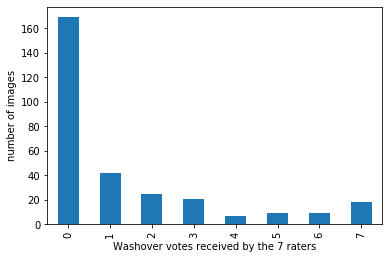

In [14]:
#plot it up
ax = joinedWash['wash_votes'].value_counts().sort_index().plot.bar()
ax.set_xlabel("Washover votes received by the 7 raters")
ax.set_ylabel("number of images")

## Get data into shape for release

In [15]:
# make data into final zenodo form
releaseData = pd.read_csv('../data/tables/Priority_1604952200293.csv')
releaseData = releaseData.drop(['_id','catalogId', 'archiveId','date','catalog','additionalComments'], axis = 1)
releaseData = releaseData.drop(['imageId'], axis = 1)
releaseData = releaseData.rename({'water': 'allWater'}, axis=1)
releaseData.head()

,userId,archive,image,allWater,devType,washoverType,dmgType,impactType,terrianType
0,5f4c002a9cdb9b001675a8e2,Florence,P26058806.jpg,True,NaN,NaN,NaN,NaN,NaN
1,5f4c002a9cdb9b001675a8e2,Michael,S28468531.jpg,NaN,developed,noWashover,noDamage,NaN,"marsh,inland,river"
2,5f4c002a9cdb9b001675a8e2,Michael,S28466899.jpg,NaN,developed,noWashover,damage,NaN,inland
3,5f4c002a9cdb9b001675a8e2,Isaias,S21773987.jpg,NaN,developed,noWashover,noDamage,swash,sandyCoastline
4,5f4c002a9cdb9b001675a8e2,Florence,P26057665.jpg,NaN,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline


In [16]:
# replace NaN in devType, washoverType, dmgType,
values = {'allWater':'False', 'devType': 'undeveloped', 'washoverType': 'noWashover', 'dmgType': 'noDamage'}

releaseData = releaseData.fillna(value=values)
releaseData.head()

,userId,archive,image,allWater,devType,washoverType,dmgType,impactType,terrianType
0,5f4c002a9cdb9b001675a8e2,Florence,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN
1,5f4c002a9cdb9b001675a8e2,Michael,S28468531.jpg,False,developed,noWashover,noDamage,NaN,"marsh,inland,river"
2,5f4c002a9cdb9b001675a8e2,Michael,S28466899.jpg,False,developed,noWashover,damage,NaN,inland
3,5f4c002a9cdb9b001675a8e2,Isaias,S21773987.jpg,False,developed,noWashover,noDamage,swash,sandyCoastline
4,5f4c002a9cdb9b001675a8e2,Florence,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline


In [17]:
releaseData.shape

(2125, 9)

In [18]:
#only keep users that finished all 300, so remove 5f4f13135463f70016a500ed 5f8f5f59e4dac20017f9070e  5fa4542fec49d20016f772a8
releaseData = releaseData[releaseData.userId != '5f4f13135463f70016a500ed']
releaseData = releaseData[releaseData.userId != '5f8f5f59e4dac20017f9070e']
releaseData = releaseData[releaseData.userId != '5fa4542fec49d20016f772a8']
releaseData.head()

,userId,archive,image,allWater,devType,washoverType,dmgType,impactType,terrianType
0,5f4c002a9cdb9b001675a8e2,Florence,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN
1,5f4c002a9cdb9b001675a8e2,Michael,S28468531.jpg,False,developed,noWashover,noDamage,NaN,"marsh,inland,river"
2,5f4c002a9cdb9b001675a8e2,Michael,S28466899.jpg,False,developed,noWashover,damage,NaN,inland
3,5f4c002a9cdb9b001675a8e2,Isaias,S21773987.jpg,False,developed,noWashover,noDamage,swash,sandyCoastline
4,5f4c002a9cdb9b001675a8e2,Florence,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline


In [19]:
#replace user IDs with `User 1`, etc...
releaseData.shape
releaseData.userId.unique()

array(['5f4c002a9cdb9b001675a8e2', '5f77871024f95e0018305349',
       '5f6635628cb36a001698427b', '5f7af56443360b001790063d',
       '5f7c8c4287bff50017610126', '5f89a4957c0f40001652c05d',
       '5f89c25b67d0e30016a5e70a'], dtype=object)

In [20]:
releaseData['userId'] = pd.factorize(releaseData.userId)[0] + 1
releaseData.userId.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [21]:
releaseData.head()

,userId,archive,image,allWater,devType,washoverType,dmgType,impactType,terrianType
0,1,Florence,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN
1,1,Michael,S28468531.jpg,False,developed,noWashover,noDamage,NaN,"marsh,inland,river"
2,1,Michael,S28466899.jpg,False,developed,noWashover,damage,NaN,inland
3,1,Isaias,S21773987.jpg,False,developed,noWashover,noDamage,swash,sandyCoastline
4,1,Florence,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline


In [22]:
#replace column ittle with NOAA flight
releaseData = releaseData.rename({'archive': 'NOAA_flight'}, axis=1)

# replace archive with specific flight
releaseData = releaseData.replace('Florence','Florence_20180917a_jpgs')
releaseData = releaseData.replace('Michael', 'Michael_20181011a_jpgs')
releaseData = releaseData.replace('Isaias','Isaias_20200804a_jpgs')

releaseData.head()

,userId,NOAA_flight,image,allWater,devType,washoverType,dmgType,impactType,terrianType
0,1,Florence_20180917a_jpgs,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN
1,1,Michael_20181011a_jpgs,S28468531.jpg,False,developed,noWashover,noDamage,NaN,"marsh,inland,river"
2,1,Michael_20181011a_jpgs,S28466899.jpg,False,developed,noWashover,damage,NaN,inland
3,1,Isaias_20200804a_jpgs,S21773987.jpg,False,developed,noWashover,noDamage,swash,sandyCoastline
4,1,Florence_20180917a_jpgs,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline


In [23]:
#save release data
releaseData.to_csv('../data/tables/ReleaseData.csv',na_rep='NaN')

## Now we can go back to splitting the washover data based on votes:

In [24]:
washTally = pd.read_csv('../data/tables/washtally.csv')

washTally = washTally.drop(['Unnamed: 0','imageId', 'archiveId'], axis = 1)

# replace archive with specific flight
washTally = washTally.replace('Florence','Florence_20180917a_jpgs')
washTally = washTally.replace('Michael', 'Michael_20181011a_jpgs')
washTally = washTally.replace('Isaias','Isaias_20200804a_jpgs')

washTally.head()

,wash_votes,archive,image
0,0,Florence_20180917a_jpgs,C26047930.jpg
1,0,Florence_20180917a_jpgs,P26047210.jpg
2,2,Florence_20180917a_jpgs,P26054148.jpg
3,1,Florence_20180917a_jpgs,P26054260.jpg
4,0,Florence_20180917a_jpgs,P26054311.jpg


In [25]:
#add the path
washTally['Image_Path'] = '../data/pics/raw/' + washTally['archive'].astype(str) + '/' + washTally['image'].astype(str)
washTally.head()

,wash_votes,archive,image,Image_Path
0,0,Florence_20180917a_jpgs,C26047930.jpg,../data/pics/raw/Florence_20180917a_jpgs/C2604...
1,0,Florence_20180917a_jpgs,P26047210.jpg,../data/pics/raw/Florence_20180917a_jpgs/P2604...
2,2,Florence_20180917a_jpgs,P26054148.jpg,../data/pics/raw/Florence_20180917a_jpgs/P2605...
3,1,Florence_20180917a_jpgs,P26054260.jpg,../data/pics/raw/Florence_20180917a_jpgs/P2605...
4,0,Florence_20180917a_jpgs,P26054311.jpg,../data/pics/raw/Florence_20180917a_jpgs/P2605...


In [26]:
for i in range(0,8):
    #pull out the list from the df
    Tally = washTally[washTally['wash_votes'] == i]
    TallyList = Tally['Image_Path'].tolist()
    #TallyList
    TallyFolder = '../data/pics/labelertoModel/Tallies/' + str(i)
    print(TallyFolder)
    #move those on the list
    for f in TallyList:
        shutil.copy(f, TallyFolder)

../data/pics/labelertoModel/Tallies/0
../data/pics/labelertoModel/Tallies/1
../data/pics/labelertoModel/Tallies/2
../data/pics/labelertoModel/Tallies/3
../data/pics/labelertoModel/Tallies/4
../data/pics/labelertoModel/Tallies/5
../data/pics/labelertoModel/Tallies/6
../data/pics/labelertoModel/Tallies/7


In [31]:
#wash no wash split
for i in range(0,8):
    #pull out the list from the df
    Tally = washTally[washTally['wash_votes'] == i]
    TallyList = Tally['Image_Path'].tolist()
    if i == 0:
        TallyFolder = '../data/pics/labelertoModel/Split3/nowash'
    elif i == 1:
        TallyFolder = '../data/pics/labelertoModel/Split3/undecided'
    else:
        TallyFolder = '../data/pics/labelertoModel/Split3/wash'
    print(TallyFolder)
    #move those on the list
    for f in TallyList:
        shutil.copy(f, TallyFolder)

../data/pics/labelertoModel/Split3/nowash
../data/pics/labelertoModel/Split3/undecided
../data/pics/labelertoModel/Split3/wash
../data/pics/labelertoModel/Split3/wash
../data/pics/labelertoModel/Split3/wash
../data/pics/labelertoModel/Split3/wash
../data/pics/labelertoModel/Split3/wash
../data/pics/labelertoModel/Split3/wash
